In [3]:
import pandas as pd

sheet_names = ['JAN','FEB','MAR','APR','MAY','JUNE','JULY','AUG','SEP','OCT','NOV','DEC']
columns = ['DATE'
           ,'INT ARRIVALS 04','INT ARRIVALS 22','INT ARRIVALS TTL'
           ,'INT DEPARTURES 04','INT DEPARTURES 22','INT DEPARTURES TTL'
           ,'LOCAL ARRIVALS 04','LOCAL ARRIVALS 22','LOCAL ARRIVALS TTL'
           ,'LOCAL DEPARTURES 04','LOCAL DEPARTURES 22','LOCAL DEPARTURES TTL'
           ,'TRANSITS FXD','TRANSITS HEL','TRANSITS TTL'
           ,'HELI LND','HELI TO','HELI TTL'
           ,'T/G','Grant Total','International Flights','Local Flights (Fixed/Heli)'
           ,'YEAR'
           ,'MONTH']


sheets = []
for y in ([2018,2019]):
    for m in sheet_names:
        twk = pd.read_excel('LARNAKA AIRPORT DAILY AIR TRAFFIC '+str(y)+'.xlsx', usecols = 'B:X',skiprows = 3, header=0, sheet_name = m)
        twk['YEAR'] = y
        twk['MONTH'] = m
        twk.columns = columns
        #twk = twk.set_index('DATE')
        sheets.append(twk)

workbook = pd.concat(sheets, axis=0)
workbook

,DATE,INT ARRIVALS 04,INT ARRIVALS 22,INT ARRIVALS TTL,INT DEPARTURES 04,INT DEPARTURES 22,INT DEPARTURES TTL,LOCAL ARRIVALS 04,LOCAL ARRIVALS 22,LOCAL ARRIVALS TTL,...,TRANSITS TTL,HELI LND,HELI TO,HELI TTL,T/G,Grant Total,International Flights,Local Flights (Fixed/Heli),YEAR,MONTH
0,1,0.0,41.0,41.0,0.0,42.0,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,83.0,83.0,0.0,2018,JAN
1,2,0.0,49.0,49.0,0.0,49.0,49.0,0.0,13.0,13.0,...,2.0,1.0,1.0,2.0,35.0,163.0,98.0,28.0,2018,JAN
2,3,0.0,63.0,63.0,0.0,61.0,61.0,0.0,6.0,6.0,...,2.0,3.0,3.0,6.0,11.0,155.0,124.0,18.0,2018,JAN
3,4,0.0,57.0,57.0,1.0,54.0,55.0,0.0,9.0,9.0,...,1.0,3.0,3.0,6.0,5.0,142.0,112.0,24.0,2018,JAN
4,5,47.0,10.0,57.0,46.0,12.0,58.0,8.0,0.0,8.0,...,1.0,2.0,2.0,4.0,12.0,148.0,115.0,20.0,2018,JAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,0.0,66.0,66.0,0.0,62.0,62.0,0.0,8.0,8.0,...,0.0,3.0,3.0,6.0,18.0,168.0,128.0,22.0,2019,DEC
28,29,0.0,58.0,58.0,0.0,68.0,68.0,0.0,0.0,0.0,...,0.0,3.0,3.0,6.0,0.0,132.0,126.0,6.0,2019,DEC
29,30,0.0,59.0,59.0,0.0,60.0,60.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,119.0,119.0,0.0,2019,DEC
30,31,0.0,48.0,48.0,0.0,47.0,47.0,0.0,12.0,12.0,...,1.0,0.0,0.0,0.0,24.0,144.0,95.0,24.0,2019,DEC


In [5]:
workbook = workbook.copy()
workbook['MONTH'] = workbook['MONTH'].apply(lambda x: 'JUN' if x=='JUNE' else x)
workbook['MONTH'] = workbook['MONTH'].apply(lambda x: 'JUL' if x=='JULY' else x)
workbook = workbook.loc[workbook['DATE'] != 'TTL']
workbook['DATE_FORMAT'] = (workbook['DATE'].astype(str) + '-' + workbook['MONTH'].astype(str) + '-' + workbook['YEAR'].astype(str))
workbook['DATE_FORMAT'] = pd.to_datetime(workbook['DATE_FORMAT'], format='%d-%b-%Y', infer_datetime_format=True, errors='coerce')
workbook = workbook.loc[~workbook['DATE_FORMAT'].isna()]
workbook = workbook.set_index('DATE_FORMAT')

In [6]:
workbook.to_csv('LARNAKA AIRPORT DAILY AIR TRAFFIC_2018-2019.csv', header=True)
workbook['Grant Total'].to_csv('LARNAKA AIRPORT DAILY AIR TRAFFIC_2018-2019 TOTAL.csv', header=True)

In [7]:
# add visualization libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
## use this custom funtion to for better view
def decompose(df, share_type='amount', samples=250, period=24):
    if samples == 'all':
        #decomposing all time series timestamps
        res = seasonal_decompose(df[share_type].values, model='additive', period=period) #[share_type]
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[share_type].values[-samples:], model='additive', period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. 
    #Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()

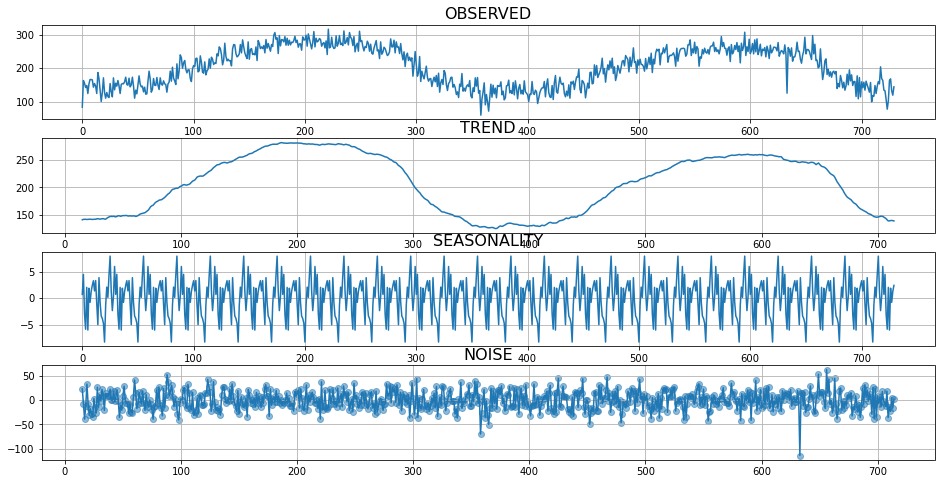

In [8]:
df = workbook['Grant Total'].reset_index().set_index('DATE_FORMAT').copy()
decompose(df,'Grant Total', 'all', 30)